# Image approximation

In [11]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from numpy import linalg as LA

In [3]:
img = Image.open('snowshoe.jpg')

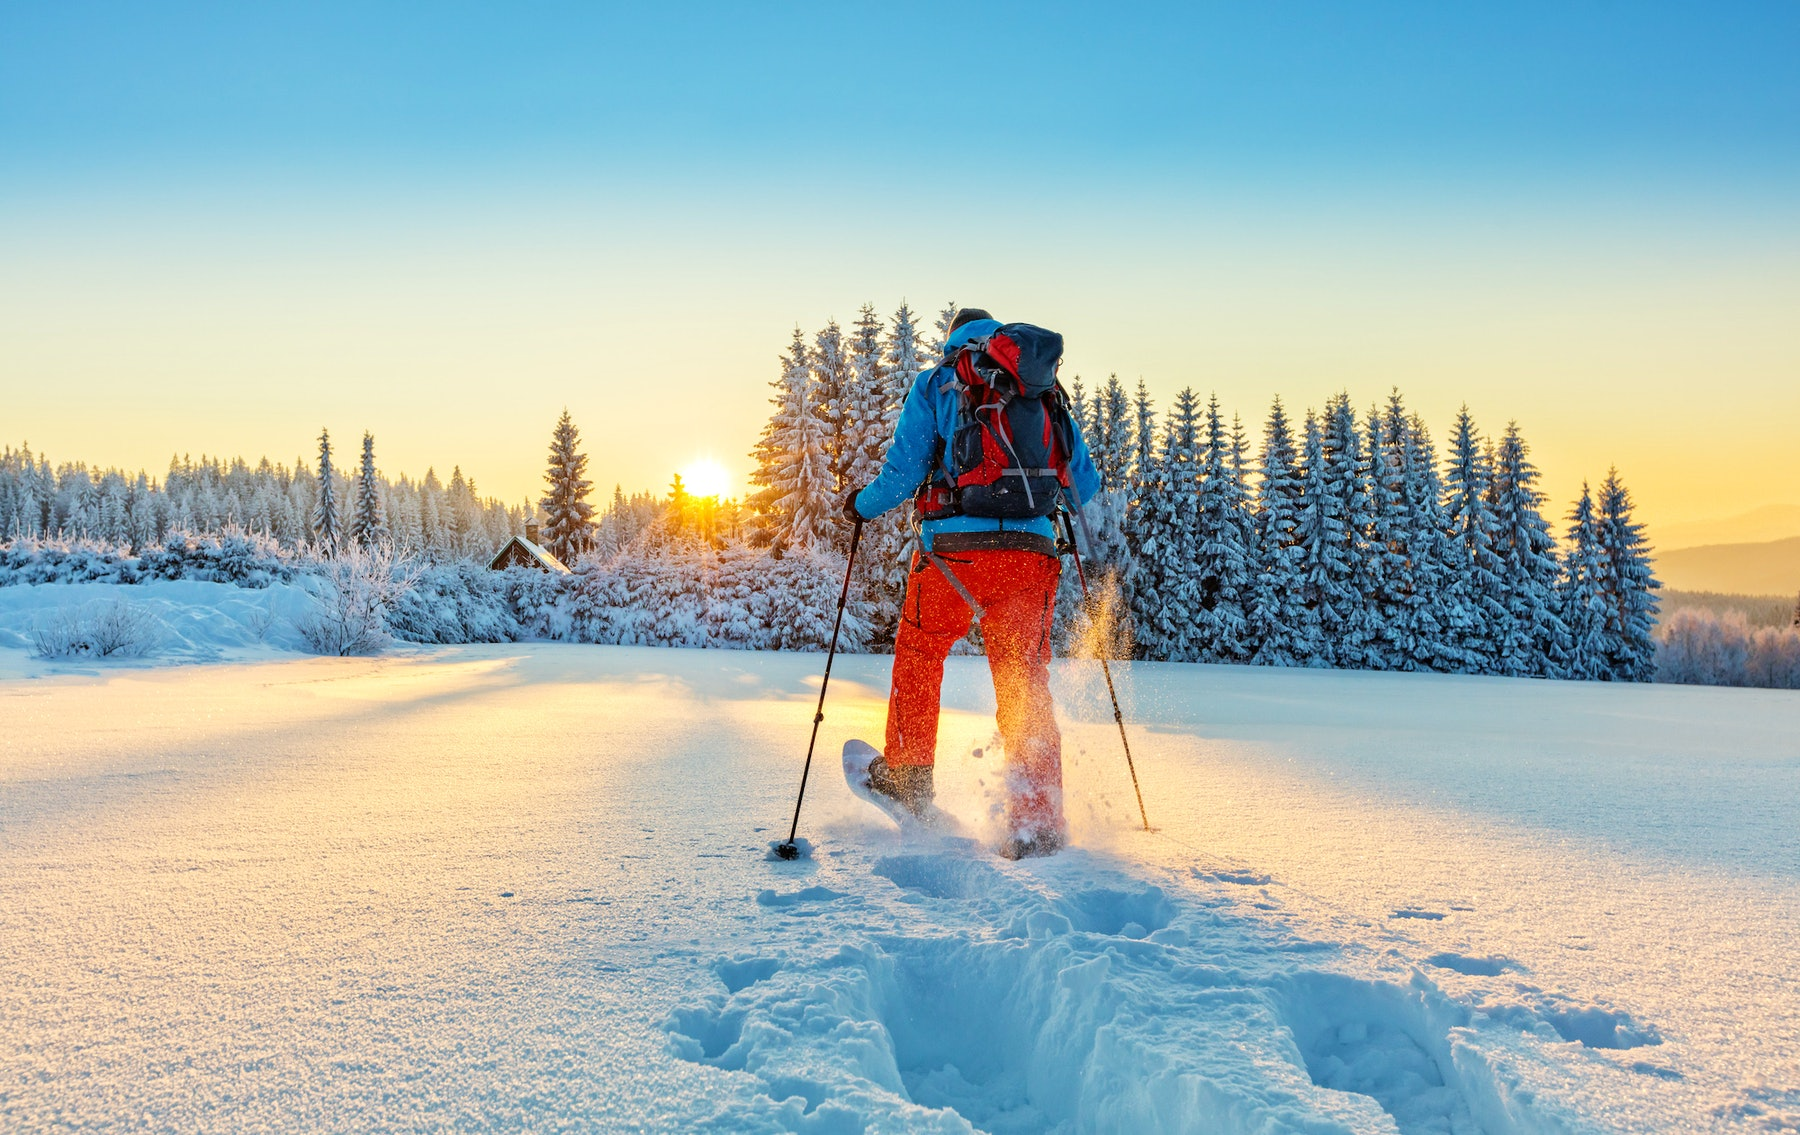

In [4]:
img

In [6]:
img_mono = img.convert('L')

In [7]:
img_matrix = np.array(img_mono)

In [9]:
img_matrix.shape

(1135, 1800)

In [12]:
U, S, VT = LA.svd(img_matrix)

In [15]:
U.shape, S.shape, VT.shape, np.count_nonzero(S)

((1135, 1135), (1135,), (1800, 1800), 1135)

In [16]:
# Singularne vrednosti matrice se nalaze u vektoru S
# (vrednost elemenata na dijagonali u SVD dekompoziciji),
# matrica ima 1135 singularnih vrednosti jer su sve vrednosti u S >= 0

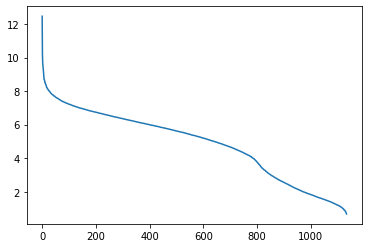

In [20]:
plt.plot(np.log(S))
plt.show()
# sopstvene vrednosti su opadajuce

In [23]:
# Odsecanjem manjih sigularnih vrednosti iz S vršimo
# aproksimaciju polazne matrice do na određenu preciznost.

# Napišimo funkciju koja na osnovu parametra k vrši
# aproksimaciju tako što pamti prvih k singularnih vrednosti.
# Uz redukovanje dimenzija niza S, smanjuje se i broj
# kolona matrice U i broj redova matrice VT.

def approximate(image, k):
    U, S, VT = LA.svd(image) # image je np.array
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    VTk = VT[:k, :]
    
    new_img_matrix = np.dot(np.dot(Uk, Sk), VTk)
    new_img = Image.fromarray(new_img_matrix).convert('L')
    return new_img

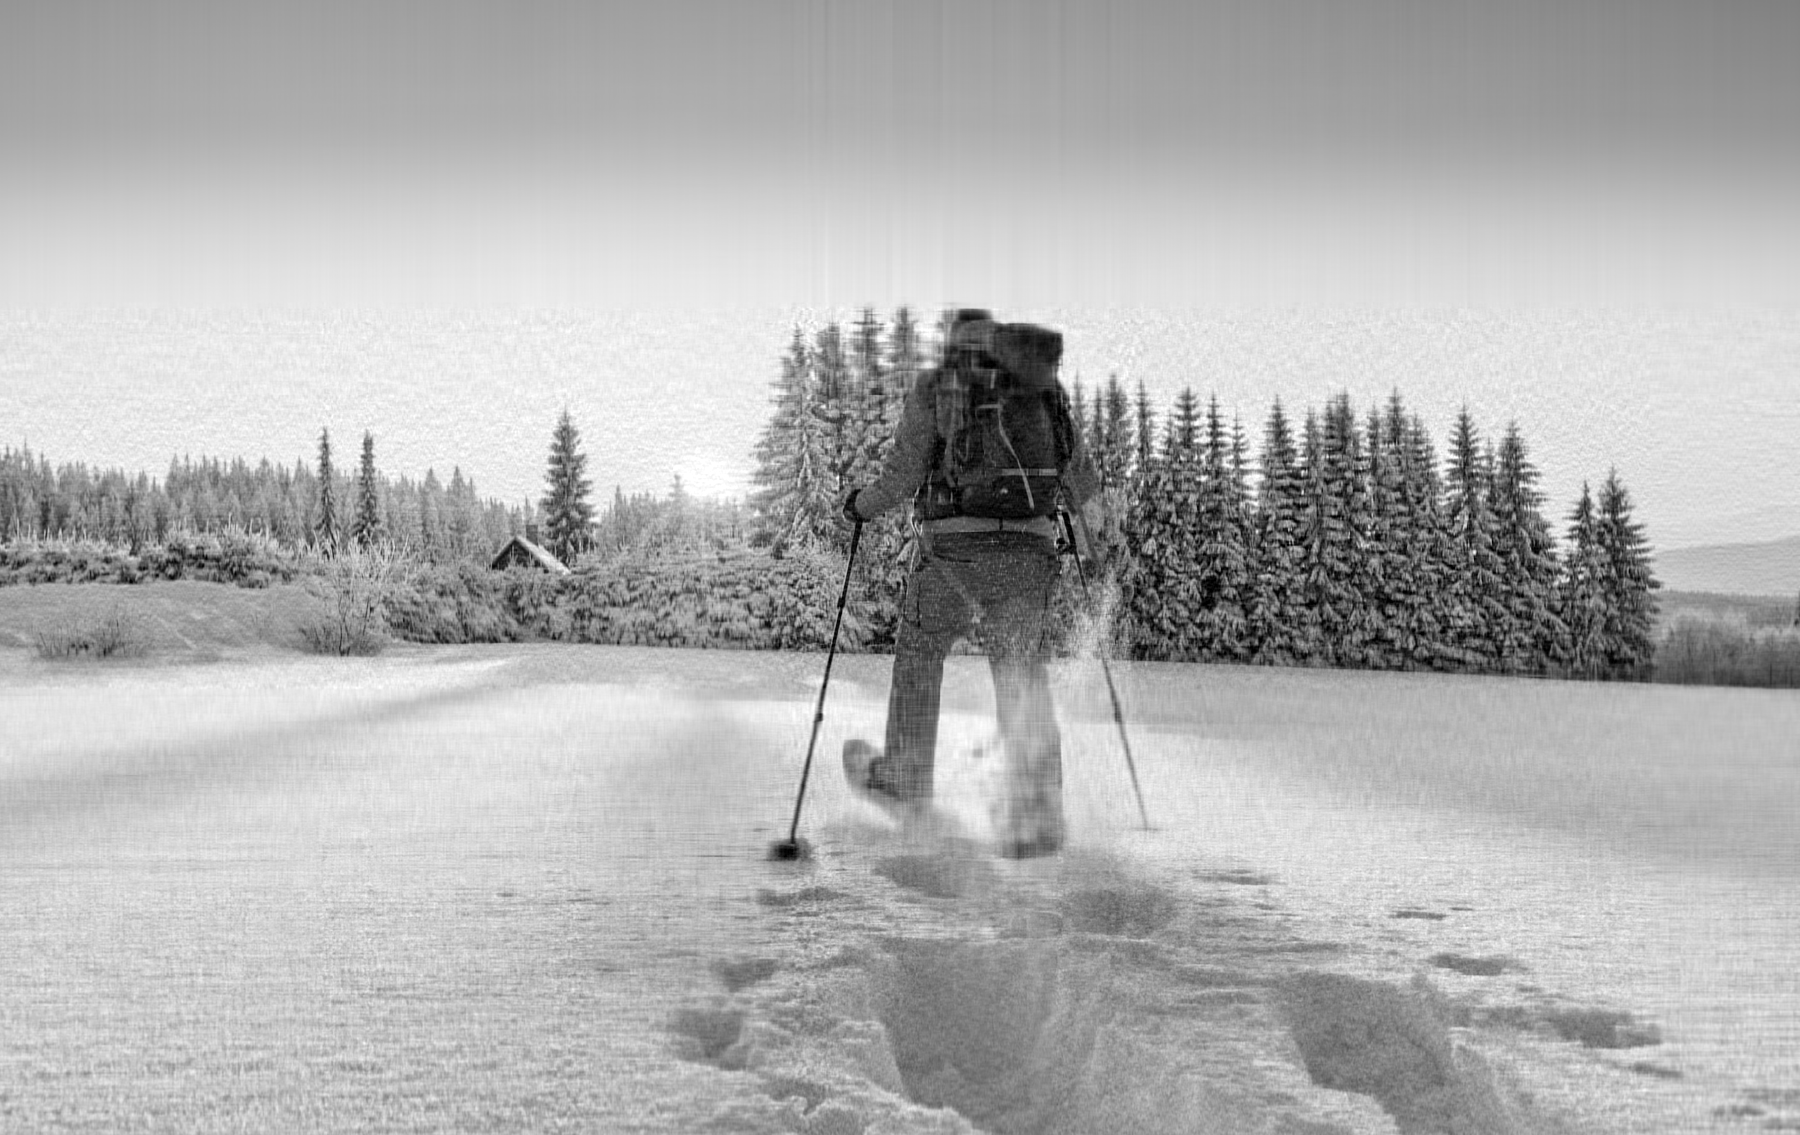

In [24]:
approximate(img_matrix, k=100)

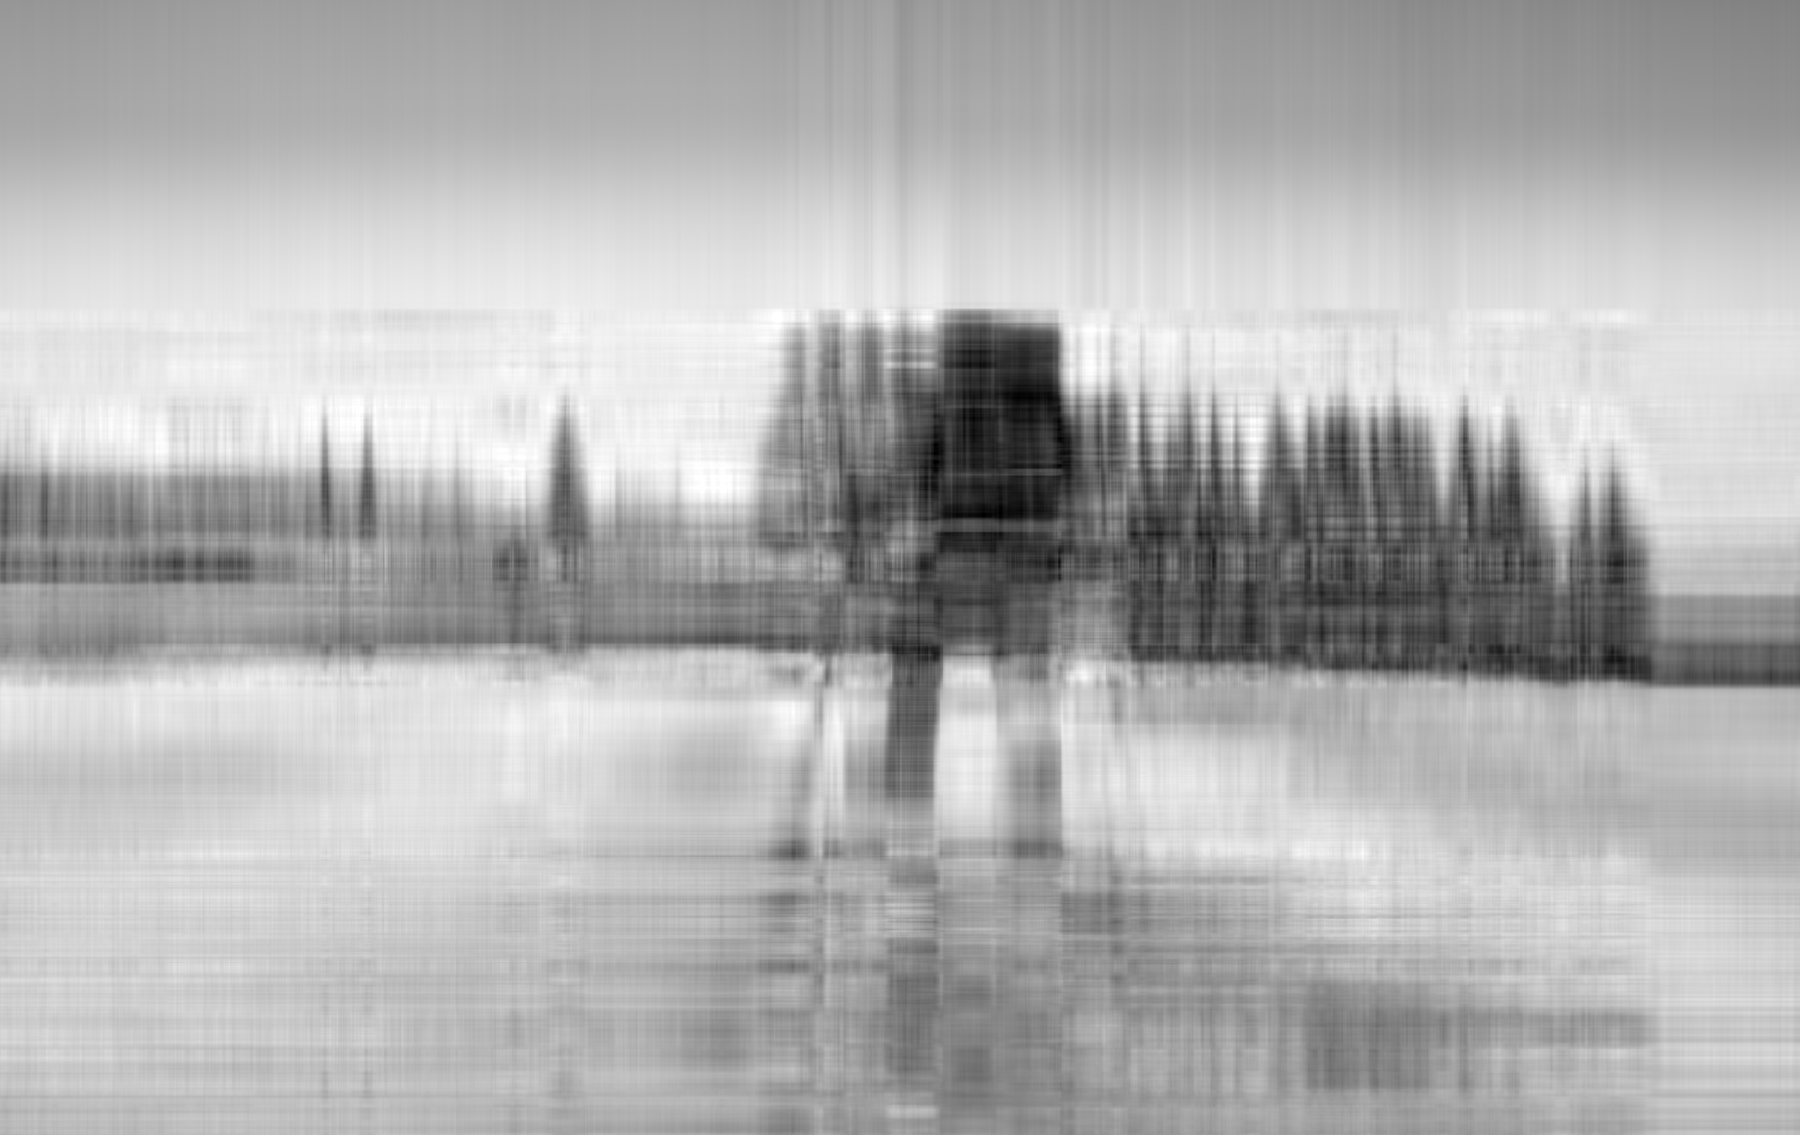

In [25]:
approximate(img_matrix, k=10)